## KARAN RAVINDRAN PILLAY 

### STUDENT ID: 989357386

# Collaborative Filtering

<img src="http://www.hederaconsulting.com/wp-content/uploads/2017/12/recommendation-engines.jpg" width="400" height="300" alt="Retail Data">

# 1. Objective of the Project:

⦿ The objective of the project is to create a recommendation engine to send emails to the targeted students with the coupons. So that the students are more likely to come to a new all-you-can-eat buffet at University of the Pacific. In this module report we run an analysis using unsupervised learning algorithm which is kmeans algorithm. 

⦿ In this module report I am using a food choices dataset downloaded from kaggle. In which I performed clustering using kMeans algorithm. It is available in a library called sklearn, with which we can cluster the datasets into groups based on some similar characteristics. So we can cluster students depending on their gender, breakfast preference and calories intake per day to send coupons so that it encourages them to come.

In [16]:
import csv
import pandas as pd 
import os
import numpy as np

In [17]:
df = pd.read_csv(r"C:\Users\Karan Pillay\Documents\food_coded.csv")
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


# 2. Data Exploration:

##### ► The describe() is used to print a detailed information about dataset.

In [18]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


##### ► Column specific describe()

In [19]:
df.GPA.describe()

count     123
unique     38
top       3.5
freq       13
Name: GPA, dtype: object

##### ► The count() is used to show the number of entries in respective attributes.

In [20]:
df.count()

GPA                             123
Gender                          125
breakfast                       125
calories_chicken                125
calories_day                    106
calories_scone                  124
coffee                          125
comfort_food                    124
comfort_food_reasons            124
comfort_food_reasons_coded      106
cook                            122
comfort_food_reasons_coded.1    125
cuisine                         108
diet_current                    124
diet_current_coded              125
drink                           123
eating_changes                  122
eating_changes_coded            125
eating_changes_coded1           125
eating_out                      125
employment                      116
ethnic_food                     125
exercise                        112
father_education                124
father_profession               122
fav_cuisine                     123
fav_cuisine_coded               125
fav_food                    

##### ► head() command is used to show the top 10 entries from the dataset 

In [21]:
df.head(n=10)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
5,2.25,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1.0,2.0,4,940.0,345,None.,1,2,1315,190
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180
7,3.3,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,...,1.0,2.0,1,725.0,500,none,4,2,1315,137
8,3.3,1,1,430,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,...,2.0,2.0,5,725.0,345,none,3,2,760,180
9,3.3,1,1,430,3.0,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1.0,...,1.0,1.0,4,580.0,345,field hockey,5,1,900,125


##### ► tail() command is used to show the last 10 entries from the dataset 

In [22]:
df.tail(n=10)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
115,3.3,2,1,610,4.0,980.0,2,"chocolate bar, ice cream, pretzels, potato chi...","Stress, boredom and physical activity",NaN,...,1.0,1.0,1,1165.0,690,Hockey,2,2,1315,150
116,3.4,1,1,610,NaN,420.0,2,"Ice cream, chocolate, pizza, cucumber","loneliness, homework, boredom",NaN,...,1.0,2.0,5,725.0,345,none,5,1,1315,170
117,3.77,1,1,610,NaN,315.0,2,"Noodle ( any kinds of noodle), Tuna sandwich, ...",When i'm eating with my close friends/ Food s...,NaN,...,1.0,2.0,5,725.0,690,"No, I don't play sport.",3,1,760,113
118,3.63,1,1,430,3.0,420.0,1,"Chinese, chips, cake",Stress and boredom,NaN,...,1.0,2.0,4,940.0,345,None,5,2,1315,140
119,3.2,2,1,610,3.0,420.0,2,"chips, rice, chicken curry,","Happiness, boredom, social event",NaN,...,1.0,1.0,5,1165.0,690,Soccer,5,2,1315,185
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135
124,3.9,1,1,430,NaN,315.0,2,"Chocolates, pizza, and Ritz.","hormones, Premenstrual syndrome.",NaN,...,1.0,2.0,2,725.0,345,NaN,4,2,575,135


##### ► dataset_name.shape gives the total number of columns and rows in the dataset 

In [23]:
df.shape

(125, 61)

##### ► len(dataset_name.index) prints the total number of rows in the dataset 

In [24]:
len(df.index)

125

##### ► len(dataset_name.columns) prints the total number of columns in the dataset

In [25]:
len(df.columns)

61

##### ► quantile() is used to calculate percentages. In the example below it is calculating the 20th percentile of 'calories_chicken' column which is 154.

In [26]:
df.calories_chicken.quantile(0.2)

430.0

##### ► quantile() is used to calculate percentages. In the example below it is calculating the 20th percentile of 'calories_scone' column which is 154.

In [28]:
df.calories_scone.quantile(0.5)

420.0

##### ► dataset_name.dropna is used to drop all NA values from the dataset. It is useful as it removes residual errors from the dataset.

In [29]:
df.dropna(inplace = True)

# 3. Dendrogram:

In [32]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
import numpy as np

##### ► setting index of GPA for creating a dendogram.

In [34]:
df = df.set_index('GPA')
del df.index.name
df


,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,2.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180
3.3,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,3.0,...,1.0,2.0,1,725.0,500,none,4,2,1315,137
3.3,1,1,430,3.0,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1.0,3.0,...,1.0,1.0,4,580.0,345,field hockey,5,1,900,125
3.5,1,1,610,3.0,980.0,2,"Pasta, grandma homemade chocolate cake anythin...",Boredom,2.0,1.0,...,1.0,1.0,2,940.0,345,soccer,5,2,900,116
3.904,1,1,720,4.0,420.0,2,"chocolate, pasta, soup, chips, popcorn","sadness, stress, cold weather",3.0,3.0,...,1.0,1.0,5,940.0,500,Running,5,1,900,110
3.4,2,1,430,3.0,420.0,2,"Cookies, popcorn, and chips","Sadness, boredom, late night snack",3.0,5.0,...,2.0,1.0,3,940.0,500,Soccer and basketball,3,2,575,264
3.6,1,1,610,3.0,420.0,2,"ice cream, cake, chocolate","stress, boredom, special occasions",1.0,2.0,...,1.0,1.0,5,1165.0,850,intramural volleyball,5,2,1315,123


##### ► creating a dataframe with 5 attributes.

In [121]:
df1 = df[['Gender', 'breakfast', 'tortilla_calories', 'turkey_calories', 'waffle_calories']]

In [123]:
Z = hierarchy.linkage(df1, 'ward')

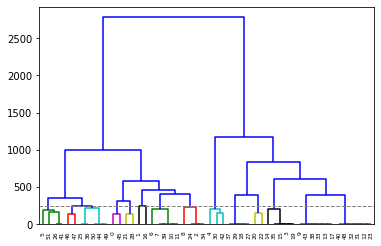

In [124]:
hierarchy.dendrogram(Z, color_threshold=240)
plt.axhline(y=240, c='grey', lw=1, linestyle='dashed')

# 5. sklearn.cluster and Step by Step Kmeans 

In [125]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [127]:
df1.describe()

,Gender,breakfast,tortilla_calories,turkey_calories,waffle_calories
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.403846,1.115385,940.576923,578.076923,1074.326923
std,0.495454,0.322603,197.252336,158.064748,250.458460
min,1.000000,1.000000,580.000000,345.000000,575.000000
25%,1.000000,1.000000,725.000000,500.000000,900.000000
50%,1.000000,1.000000,940.000000,500.000000,1107.500000
75%,2.000000,1.000000,1165.000000,690.000000,1315.000000
max,2.000000,2.000000,1165.000000,850.000000,1315.000000


In [142]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,52.000000,52.000000,52.00000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.403846,1.115385,600.00000,3.076923,517.596154,1.730769,2.384615,2.615385,2.326923,1.230769,...,2.615385,3.096154,1.173077,1.173077,3.211538,940.576923,578.076923,4.076923,1.423077,1074.326923
std,0.495454,0.322603,109.98663,0.588989,229.911514,0.447888,1.783957,1.140242,1.641629,0.782539,...,1.330691,1.175895,0.382005,0.382005,1.362474,197.252336,158.064748,1.006764,0.498867,250.458460
min,1.000000,1.000000,265.00000,2.000000,315.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,610.00000,3.000000,420.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,4.000000,1.000000,900.000000
50%,1.000000,1.000000,610.00000,3.000000,420.000000,2.000000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,1.000000,1107.500000
75%,2.000000,1.000000,637.50000,3.000000,420.000000,2.000000,3.000000,3.000000,3.000000,1.000000,...,3.250000,4.000000,1.000000,1.000000,4.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.00000,4.000000,980.000000,2.000000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


##### ► plotting datapoints from dataframe for attributes 'tortillas_calories' and 'turkey_calories'.

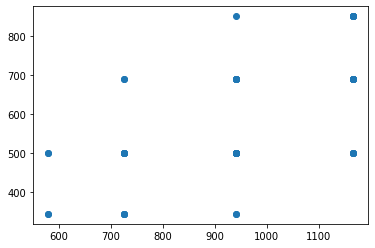

In [174]:

X = df['tortilla_calories'].values
Y = df['turkey_calories'].values
plt.scatter(X,Y)
plt.show()

In [175]:
M = np.array(list(zip(X,Y)))

In [195]:
k = 3

In [196]:
C_x =  np.random.randint(0, np.max(M)-20, size=k)
C_y =  np.random.randint(0, np.max(M)-20, size=k)

In [197]:
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

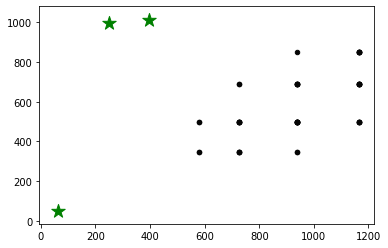

In [198]:
plt.scatter(X,Y, c='#050505', s=20)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')


In [199]:
kmeans = KMeans (n_clusters=k)
kmeans= kmeans.fit(M)
labels= kmeans.predict(M)
centroids=kmeans.cluster_centers_

final centroids
[[ 688.75        465.625     ]
 [ 991.13636364  537.72727273]
 [1148.92857143  770.        ]]
final centroids
[[ 688.75        465.625     ]
 [ 991.13636364  537.72727273]
 [1148.92857143  770.        ]]
final centroids
[[ 688.75        465.625     ]
 [ 991.13636364  537.72727273]
 [1148.92857143  770.        ]]


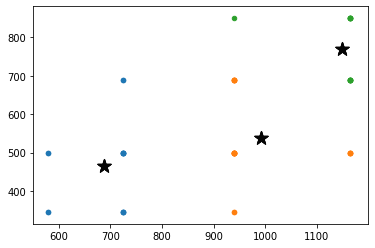

In [200]:
color = ['r', 'g','b','y', 'c', 'm', 'o', 'w']
fig2 = plt.figure()
kx = fig2.add_subplot(111)

for i in range(k):
        points = np.array([M[j] for j  in range(len(M)) if labels[j] == i])
        kx.scatter(points[:, 0], points[:, 1], s=20, cmap='rainbow')
        kx.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
        print("final centroids")
        print(centroids)
     

# 7. Summary 

⦿ The engine that I have created is called collabprative filtering. In this we are tracking the calories intake of the students based on their calories intake of turkey and tortilla's and based on that the engine is sending the coupons to the students with similar calorie intake group. The dataset is first trained and then tested which follows the principals of machine learning. 

⦿ With this engine it is now easy to cluster and identify the groups of the people that share similar calories intake and help us to send coupon to those that have similar calories intake based on turkey and tortilla. With the use of non supervised learning method I used kmeans clustering algorithm to compute this dataset for training and testing the dataset for generating a recommendation engine that allows us to send coupons to students to invite them to buffet at University of the Pacific. 